# Apply Multiple (Linear Algorithm)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\abhis\DATA SCIENCE SUBJECT & AI\Machine Learning\PROJECTS\Admission_predict ( Multiple Regression )(MR) Project-(3)\cleaned_data.xlsx")
df.head()

,Unnamed: 0,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,337,118,4,4.5,4.5,9.65,1,0.92
1,1,324,107,4,4.0,4.5,8.87,1,0.76
2,2,316,104,3,3.0,3.5,8.00,1,0.72
3,3,322,110,3,3.5,2.5,8.67,1,0.80
4,4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df=df.drop(columns=["Unnamed: 0"])

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
x=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]
y=df['Chance of Admit ']

# Train_test_split

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [8]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
231,319,106,3,3.5,2.5,8.33,1
412,314,102,4,2.5,2.0,7.88,1
92,298,98,2,4.0,3.0,8.03,0
284,340,112,4,5.0,4.5,9.66,1
44,326,113,5,4.5,4.0,9.40,1
...,...,...,...,...,...,...,...
133,323,112,5,4.0,4.5,8.78,0
361,334,116,4,4.0,3.5,9.54,1
497,330,120,5,4.5,5.0,9.56,1
340,312,107,3,3.0,3.0,8.46,1


In [9]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
370,310,103,2,2.5,2.5,8.24,0
56,316,102,3,2.0,3.0,7.40,0
149,311,106,2,3.5,3.0,8.26,1
247,311,104,2,2.5,3.5,8.48,0
97,331,120,3,4.0,4.0,8.96,1
...,...,...,...,...,...,...,...
107,338,117,4,3.5,4.5,9.46,1
259,331,119,4,5.0,4.5,9.34,1
378,303,98,1,2.0,2.5,7.65,0
355,317,106,2,2.0,3.5,8.12,0


# Multiple (Linear Regression) algo

# Step - 4 Modeling

In [10]:
# Modeling
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

# coffeicient & Intercept
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient: [ 0.00191141  0.00324231  0.0058481  -0.00215774  0.01650554  0.11999854
  0.02533459]
Intercept: -1.3433815544396481


In [11]:
test_predictions = model.predict(x_test)

# Model Selection

# Check whether the model has overfitting or underfitting problem

In [12]:
train_predictions = model.predict(x_train)
print("Train R2:",model.score(x_train,y_train))

Train R2: 0.8293590251003071


# Check whether Train Accuracy = Cross validation Score

In [13]:
from sklearn.model_selection import cross_val_score
print("Cross-Validation Score:",cross_val_score(model,x,y,cv=5).mean())

Cross-Validation Score: 0.8108015220863886


# Step-5 : Evalution Metrics

In [14]:
print("Test R2:",model.score(x_test,y_test))

Test R2: 0.7858508184037285


# Check all Assumptions

### 1. Linearity of Errors

In [15]:
test_res = y_test - test_predictions

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

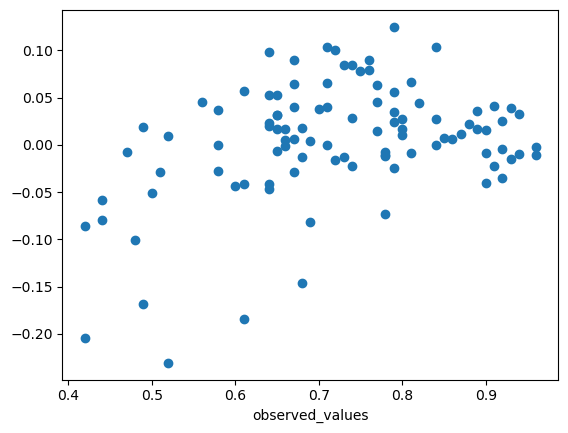

In [16]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.ylable("fitted_values")
plt.show()

### 2.Normality of Errors

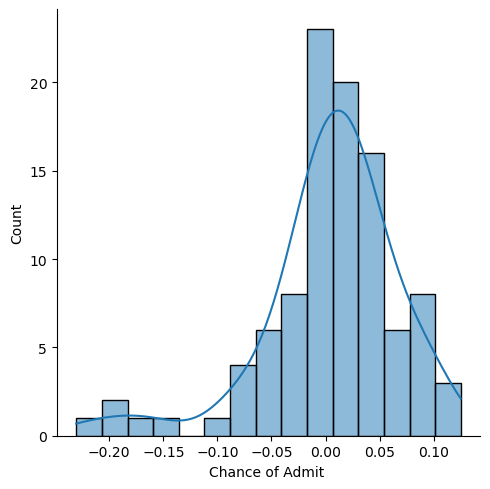

In [26]:
sns.displot(test_res,bins=15,kde=True)
plt.show()

### 3. Equal variance of Erroes (Homoscadesicity)

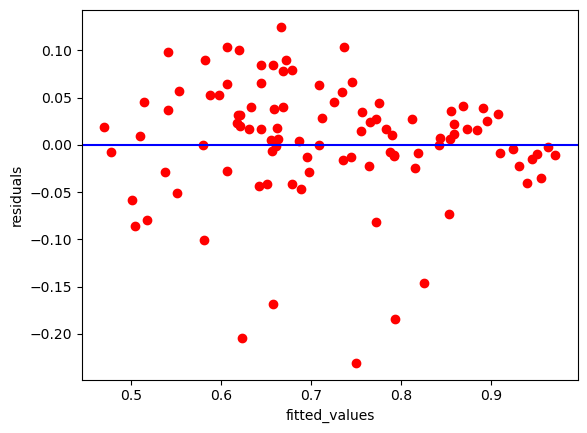

In [27]:
plt.scatter(test_predictions,test_res,c="r")
plt.axhline(y=0,color="blue")
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

### 4. Variable Significance

In [28]:
import statsmodels.formula.api as smf
model1=smf.ols("y~x",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.1
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          4.29e-181
Time:                        16:37:50   Log-Likelihood:                 701.32
No. Observations:                 500   AIC:                            -1389.
Df Residuals:                     493   BIC:                            -1359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2800      0.103    -12.371      0.000      -1.483      -1.077
x[0]           0.0019      0.001      3.694      0.000       0.001       0.003
x[1]           0.0028      0.001      3.236      0.001       0.001       0.005
x[2]           0.0064      0.004      1.820      0.069      -0.001       0.013
x[3]           0.0173      0.004      4.380      0.000       0.010       0.025
x[4]           0.1190      0.010     12.481      0.000       0.100       0.138
x[5]           0.0244      0.007      3.691      0.000       0.011       0.037
==============================================================================
Omnibus:                      111.782   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.656
Skew:                          -1.152   Prob(JB):                     6.82e-57
Kurtosis:                       5.667   Cond. No.                     1.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Added variable plot (Av PLot)
### partial differention instead of normal differentiation

C:\Users\abhis\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\abhis\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\abhis\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

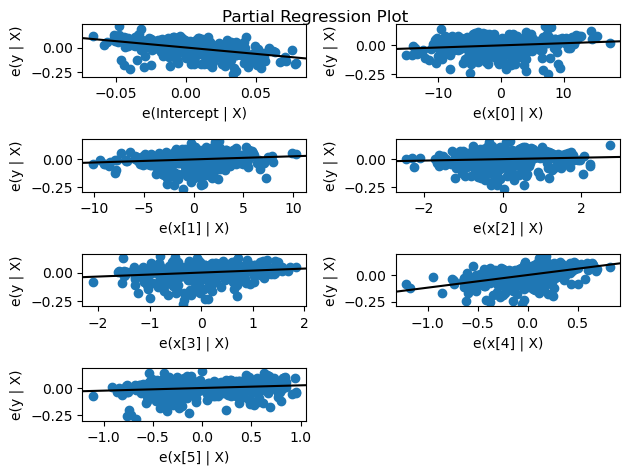

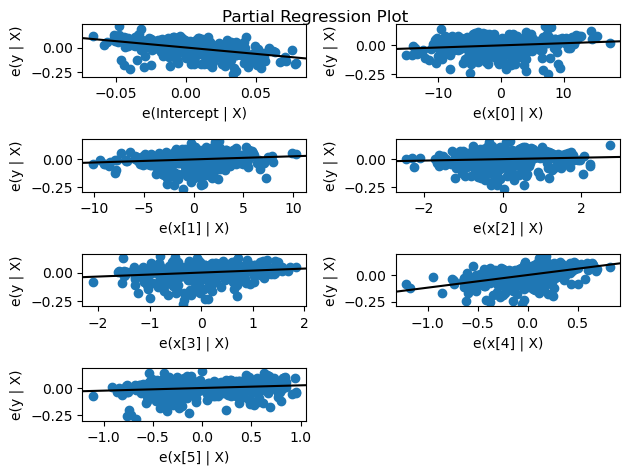

In [29]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)

In [30]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


### Remove S0P because p-value SOP as 0.7 more then 0.5 we have to do drop that column

In [31]:
df=df.drop(columns=['SOP'])
df

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,9.65,1,0.92
1,324,107,4,4.5,8.87,1,0.76
2,316,104,3,3.5,8.00,1,0.72
3,322,110,3,2.5,8.67,1,0.80
4,314,103,2,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
495,332,108,5,4.0,9.02,1,0.87
496,337,117,5,5.0,9.87,1,0.96
497,330,120,5,5.0,9.56,1,0.93
498,312,103,4,5.0,8.43,0,0.73


In [32]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Final model including  GRE ,Score,TOEFL,Score,University Rating,LOR,CGPA,Research

In [18]:
x=df[['GRE Score', 'TOEFL Score', 'University Rating', 'LOR ', 'CGPA',
       'Research']]
y=df['Chance of Admit ']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=8)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
train_predictions=model.predict(x_train)
test_predictions =model.predict(x_test)
print("Train R2:", model.score (x_train, y_train))
print("Test R2:", model.score (x_test,y_test))
print("Cross Validation Score:", cross_val_score (model, x,y,cv=5).mean())

Intercept: -1.3367969836294387
Coefficients: [0.00191578 0.00319632 0.00524222 0.01588621 0.11927228 0.02528497]
Train R2: 0.8292743579706157
Test R2: 0.7873306020207209
Cross Validation Score: 0.8137472528076823
